# Topic Clustering 

the project_cluster.csv has 26 topics that each have projects from the 'objectives' column of H2020 dataset. The project abstracts extracted from the mentioned column were pre-processed to undergo NLP and produce tokens that could be classified as belonging to a particular topic. 



In [351]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
topic_df = pd.read_csv("project_cluster.csv")
df = pd.read_csv("df_test.csv")

In [6]:
#processed topics according to their weighting in relation to the proposed topics
topic_df.head()

,index,tc_aircraft,tc_bio_chemistry,tc_biology_evolutionary,tc_climate_marine,tc_computational_methods,tc_culture_development,tc_data,tc_energy,tc_generic_academic_activities,...,tc_materials,tc_medical,tc_nanotech,tc_neuroscience_cognitive_science,tc_recycling,tc_robotics,tc_smes,tc_social_policy,tc_soil,tc_transport
0,0,0.000000,0.012447,0.000000,0.000000,0.0,0.000000,0.000000,0.011330,0.000000,...,0.000000,0.0,0.012522,0.027612,0.000000,0.0,0.000000,0.000000,0.0,0.060875
1,1,0.000000,0.000000,0.103373,0.026957,0.0,0.093805,0.472163,0.036605,0.000000,...,0.040395,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,2,0.093608,0.000000,0.000000,0.000000,0.0,0.035081,0.000000,0.206959,0.000000,...,0.052035,0.0,0.000000,0.000000,0.011552,0.0,0.019406,0.000000,0.0,0.025013
3,3,0.000000,0.000000,0.000000,0.000000,0.0,0.067213,0.000000,0.000000,0.039875,...,0.024831,0.0,0.021388,0.000000,0.000000,0.0,0.077822,0.000000,0.0,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.0,0.363219,0.000000,0.000000,0.000000,...,0.339300,0.0,0.015203,0.000000,0.000000,0.0,0.000000,0.022125,0.0,0.000000


In [7]:
#abstract tokens' values representing each project's weighting significance within a topic. 

topic_df['top_topic'] = topic_df.iloc[:,1:].apply(lambda x: x.idxmax(),axis=1)

In [8]:
# topics assigned to the abstract most affiliated with in regards to the token weighting of each abstract 
#indx 0 shows the abstract in this project is most affiliated with infrustructure for example
topic_df.top_topic

0                          tc_infrastructure
1                                    tc_data
2        tc_manufacturing_process_efficiency
3                          tc_infrastructure
4                     tc_culture_development
5                                tc_genetics
6                     tc_culture_development
7                             tc_health_tech
8        tc_manufacturing_process_efficiency
9                     tc_culture_development
10                                   tc_data
11                  tc_computational_methods
12                            tc_health_tech
13       tc_manufacturing_process_efficiency
14                                 tc_energy
15            tc_generic_academic_activities
16       tc_manufacturing_process_efficiency
17       tc_manufacturing_process_efficiency
18         tc_neuroscience_cognitive_science
19                                 tc_energy
20                    tc_culture_development
21       tc_manufacturing_process_efficiency
22        

In [293]:
# The number of projects per topic
topic_df['top_topic'].value_counts()

tc_manufacturing_process_efficiency    2874
tc_generic_terminology                 1565
tc_genetics                            1171
tc_culture_development                 1167
tc_materials                           1074
tc_data                                 733
tc_health_tech                          655
tc_energy                               300
tc_computational_methods                275
tc_biology_evolutionary                 230
tc_neuroscience_cognitive_science       215
tc_smes                                 173
tc_bio_chemistry                        163
tc_medical                              161
tc_infrastructure                        62
tc_climate_marine                        56
tc_nanotech                              50
tc_social_policy                         42
tc_transport                             27
tc_industrial_internet                   23
tc_generic_academic_activities           15
tc_recycling                             13
tc_robotics                     

In [75]:
print (pd.to_datetime(df.startDate, errors='coerce').dt.year)

0        2015.0
1        2015.0
2        2015.0
3        2015.0
4        2015.0
5        2015.0
6        2015.0
7        2015.0
8        2015.0
9        2015.0
10       2015.0
11       2015.0
12       2015.0
13       2015.0
14       2015.0
15       2015.0
16       2015.0
17       2015.0
18       2015.0
19       2014.0
20       2015.0
21       2015.0
22       2014.0
23       2014.0
24       2015.0
25       2015.0
26       2015.0
27       2015.0
28       2015.0
29       2015.0
          ...  
11039    2016.0
11040    2016.0
11041    2017.0
11042    2017.0
11043    2017.0
11044    2017.0
11045    2017.0
11046    2017.0
11047    2017.0
11048    2016.0
11049    2017.0
11050    2017.0
11051    2017.0
11052    2017.0
11053    2017.0
11054    2016.0
11055    2016.0
11056    2017.0
11057    2017.0
11058    2016.0
11059    2016.0
11060    2017.0
11061    2017.0
11062    2017.0
11063    2016.0
11064    2017.0
11065    2017.0
11066    2017.0
11067    2016.0
11068    2017.0
Name: startDate, dtype: 

# Concatenate 

concatenate the two dataframes ;  containing top topics and the other containing the year and country

In [10]:
topics = topic_df[['top_topic']]
topics

,top_topic
0,tc_infrastructure
1,tc_data
2,tc_manufacturing_process_efficiency
3,tc_infrastructure
4,tc_culture_development
5,tc_genetics
6,tc_culture_development
7,tc_health_tech
8,tc_manufacturing_process_efficiency
9,tc_culture_development


In [71]:
year_country = df[['startDate', 'coordinatorCountry']]
year_country

,startDate,coordinatorCountry
0,2015-06-01,UK
1,2015-09-04,UK
2,2015-05-01,DE
3,2015-06-01,ES
4,2015-10-01,DE
5,2015-05-01,ES
6,2015-06-01,UK
7,2015-06-01,UK
8,2015-06-01,TR
9,2015-06-01,NO


In [292]:
#concat topic, year, country
tyc = pd.concat([year_country, topics], axis = 1)
tyc

,startDate,coordinatorCountry,top_topic
0,2015-06-01,UK,tc_infrastructure
1,2015-09-04,UK,tc_data
2,2015-05-01,DE,tc_manufacturing_process_efficiency
3,2015-06-01,ES,tc_infrastructure
4,2015-10-01,DE,tc_culture_development
5,2015-05-01,ES,tc_genetics
6,2015-06-01,UK,tc_culture_development
7,2015-06-01,UK,tc_health_tech
8,2015-06-01,TR,tc_manufacturing_process_efficiency
9,2015-06-01,NO,tc_culture_development


# Split year by (' - ') and turn into integer

In [302]:
# convert year from string to int and split for the hyphen and only take the first element
def mod_strings(date_str):
    try:
        return int(date_str.split('-')[0])
    except (AttributeError, IndexError):  # in case value is not as 
                                          # expected returning original value as in this case there are NaN
        return date_str

tyc.startDate = tyc.startDate.apply(mod_strings)

In [303]:
# year split for all and turned into a float
tyc 

,startDate,coordinatorCountry,top_topic
0,2015.0,UK,tc_infrastructure
1,2015.0,UK,tc_data
2,2015.0,DE,tc_manufacturing_process_efficiency
3,2015.0,ES,tc_infrastructure
4,2015.0,DE,tc_culture_development
5,2015.0,ES,tc_genetics
6,2015.0,UK,tc_culture_development
7,2015.0,UK,tc_health_tech
8,2015.0,TR,tc_manufacturing_process_efficiency
9,2015.0,NO,tc_culture_development


# Groupby

## All the groupby variations tried 

tyc.groupby(['top_topic', 'coordinatorCountry'])['startDate'].min()

grouped by how many topics per country --> tyc['startDate'].groupby([tyc.coordinatorCountry, tyc.top_topic]).count()

describes the numbers tyc['startDate'].groupby([tyc.coordinatorCountry, tyc.top_topic]).describe()
another count

grouped = tyc.groupby(['coordinatorCountry', 'top_topic'])['startDate'].count()
grouped


#### Group the dataframe by country, and for each country,
for top_topic, startDate in tyc.groupby('coordinatorCountry'):
    # print the top topic
    print(top_topic)
    #### print the years of that country's involvement with the topic
    print(startDate)
    

####  Group the dataframe by topic, and for each country,
for startDate, coordinatorCountry in tyc.groupby('top_topic'):
    # print the top topic
    print(startDate)
    #### print the years of that country's involvement with the topic
    print(coordinatorCountry)

In [443]:
tyc.groupby(['top_topic', 'coordinatorCountry'])['startDate'].count()

top_topic                coordinatorCountry
tc_aircraft              FI                     1
                         FR                     2
                         IT                     1
                         NL                     1
                         UK                     2
tc_bio_chemistry         AT                     3
                         BE                     8
                         CH                     4
                         CY                     1
                         DE                    17
                         DK                     9
                         ES                    24
                         FI                     4
                         FR                    13
                         IE                     7
                         IL                     2
                         IT                     6
                         LU                     1
                         NL                    18
      

In [321]:
#how many countries coordinating a project within that topic by year
country_count = tyc.groupby(['top_topic', 'startDate']).count()
country_count

coordinatorCountry
top_topic                         startDate                    
tc_aircraft                       2014.0                      2
                                  2015.0                      2
                                  2016.0                      3
tc_bio_chemistry                  2014.0                      1
                                  2015.0                     68
                                  2016.0                     75
                                  2017.0                     19
tc_biology_evolutionary           2014.0                      1
                                  2015.0                    100
                                  2016.0                    102
                                  2017.0                     27
tc_climate_marine                 2014.0                      1
                                  2015.0                     25
                                  2016.0                     25
                                  2017.0                      5
tc_computational_methods          2014.0                      1
                                  2015.0                    120
                                  2016.0                    119
                                  2017.0                     34
tc_culture_development            2014.0                     11
                                  2015.0                    418
                                  2016.0                    579
                                  2017.0                    155
                                  2018.0                      1
tc_data                           2014.0                     14
                                  2015.0                    326
                                  2016.0                    307
                                  2017.0                     86
tc_energy                         2014.0                     11
                                  2015.0                    144
...                                                         ...
tc_materials                      2017.0                    134
tc_medical                        2014.0                      1
                                  2015.0                     64
                                  2016.0                     78
                                  2017.0                     17
tc_nanotech                       2014.0                      2
                                  2015.0                     30
                                  2016.0                     13
                                  2017.0                      5
tc_neuroscience_cognitive_science 2014.0                      2
                                  2015.0                     82
                                  2016.0                     97
                                  2017.0                     33
tc_recycling                      2015.0                      8
                                  2016.0                      5
tc_robotics                       2015.0                      4
                                  2016.0                      3
tc_smes                           2014.0                     73
                                  2015.0                     86
                                  2016.0                     13
                                  2017.0                      1
tc_social_policy                  2015.0                     22
                                  2016.0                     13
                                  2017.0                      6
tc_soil                           2015.0                      1
                                  2016.0                      3
tc_transport                      2014.0                      2
                                  2015.0                      9
                                  2016.0                     15
                                  2017.0                      1

[95 rows x 1

In [337]:
#how many projects per country each year
topic_count = tyc.groupby(['coordinatorCountry', 'startDate']).count()
topic_count

top_topic
coordinatorCountry startDate           
AI                 2016.0             1
AM                 2016.0             1
AT                 2014.0             8
                   2015.0           117
                   2016.0           122
                   2017.0            33
BA                 2014.0             1
                   2016.0             1
BE                 2014.0             8
                   2015.0           152
                   2016.0           163
                   2017.0            52
BG                 2014.0             2
                   2015.0             9
                   2016.0             5
                   2017.0             2
CH                 2014.0             3
                   2015.0            45
                   2016.0           156
                   2017.0            58
CY                 2014.0             1
                   2015.0            22
                   2016.0            18
                   2017.0             3
CZ                 2014.0             1
                   2015.0            20
                   2016.0            23
                   2017.0             5
DE                 2014.0            37
                   2015.0           569
...                                 ...
RS                 2014.0             4
                   2015.0             6
                   2016.0             9
                   2017.0             2
SE                 2014.0             8
                   2015.0           131
                   2016.0           118
                   2017.0            36
                   2018.0             1
SI                 2014.0             4
                   2015.0            33
                   2016.0            27
                   2017.0             1
SK                 2014.0             2
                   2015.0            11
                   2016.0            15
TR                 2014.0             6
                   2015.0            30
                   2016.0            27
                   2017.0             1
UA                 2016.0             3
                   2017.0             1
UK                 2014.0            47
                   2015.0           879
                   2016.0           995
                   2017.0           226
                   2018.0             1
UY                 2015.0             1
ZA                 2015.0             1
                   2016.0             1

[150 rows x 1 columns]

In [427]:
t = tyc.groupby(['top_topic']).count()
c = tyc.groupby(['coordinatorCountry']).count()
y = tyc.groupby(['startDate']).count()

# Topic counts per country per year

From this take select countries and 2-3 topis to plot

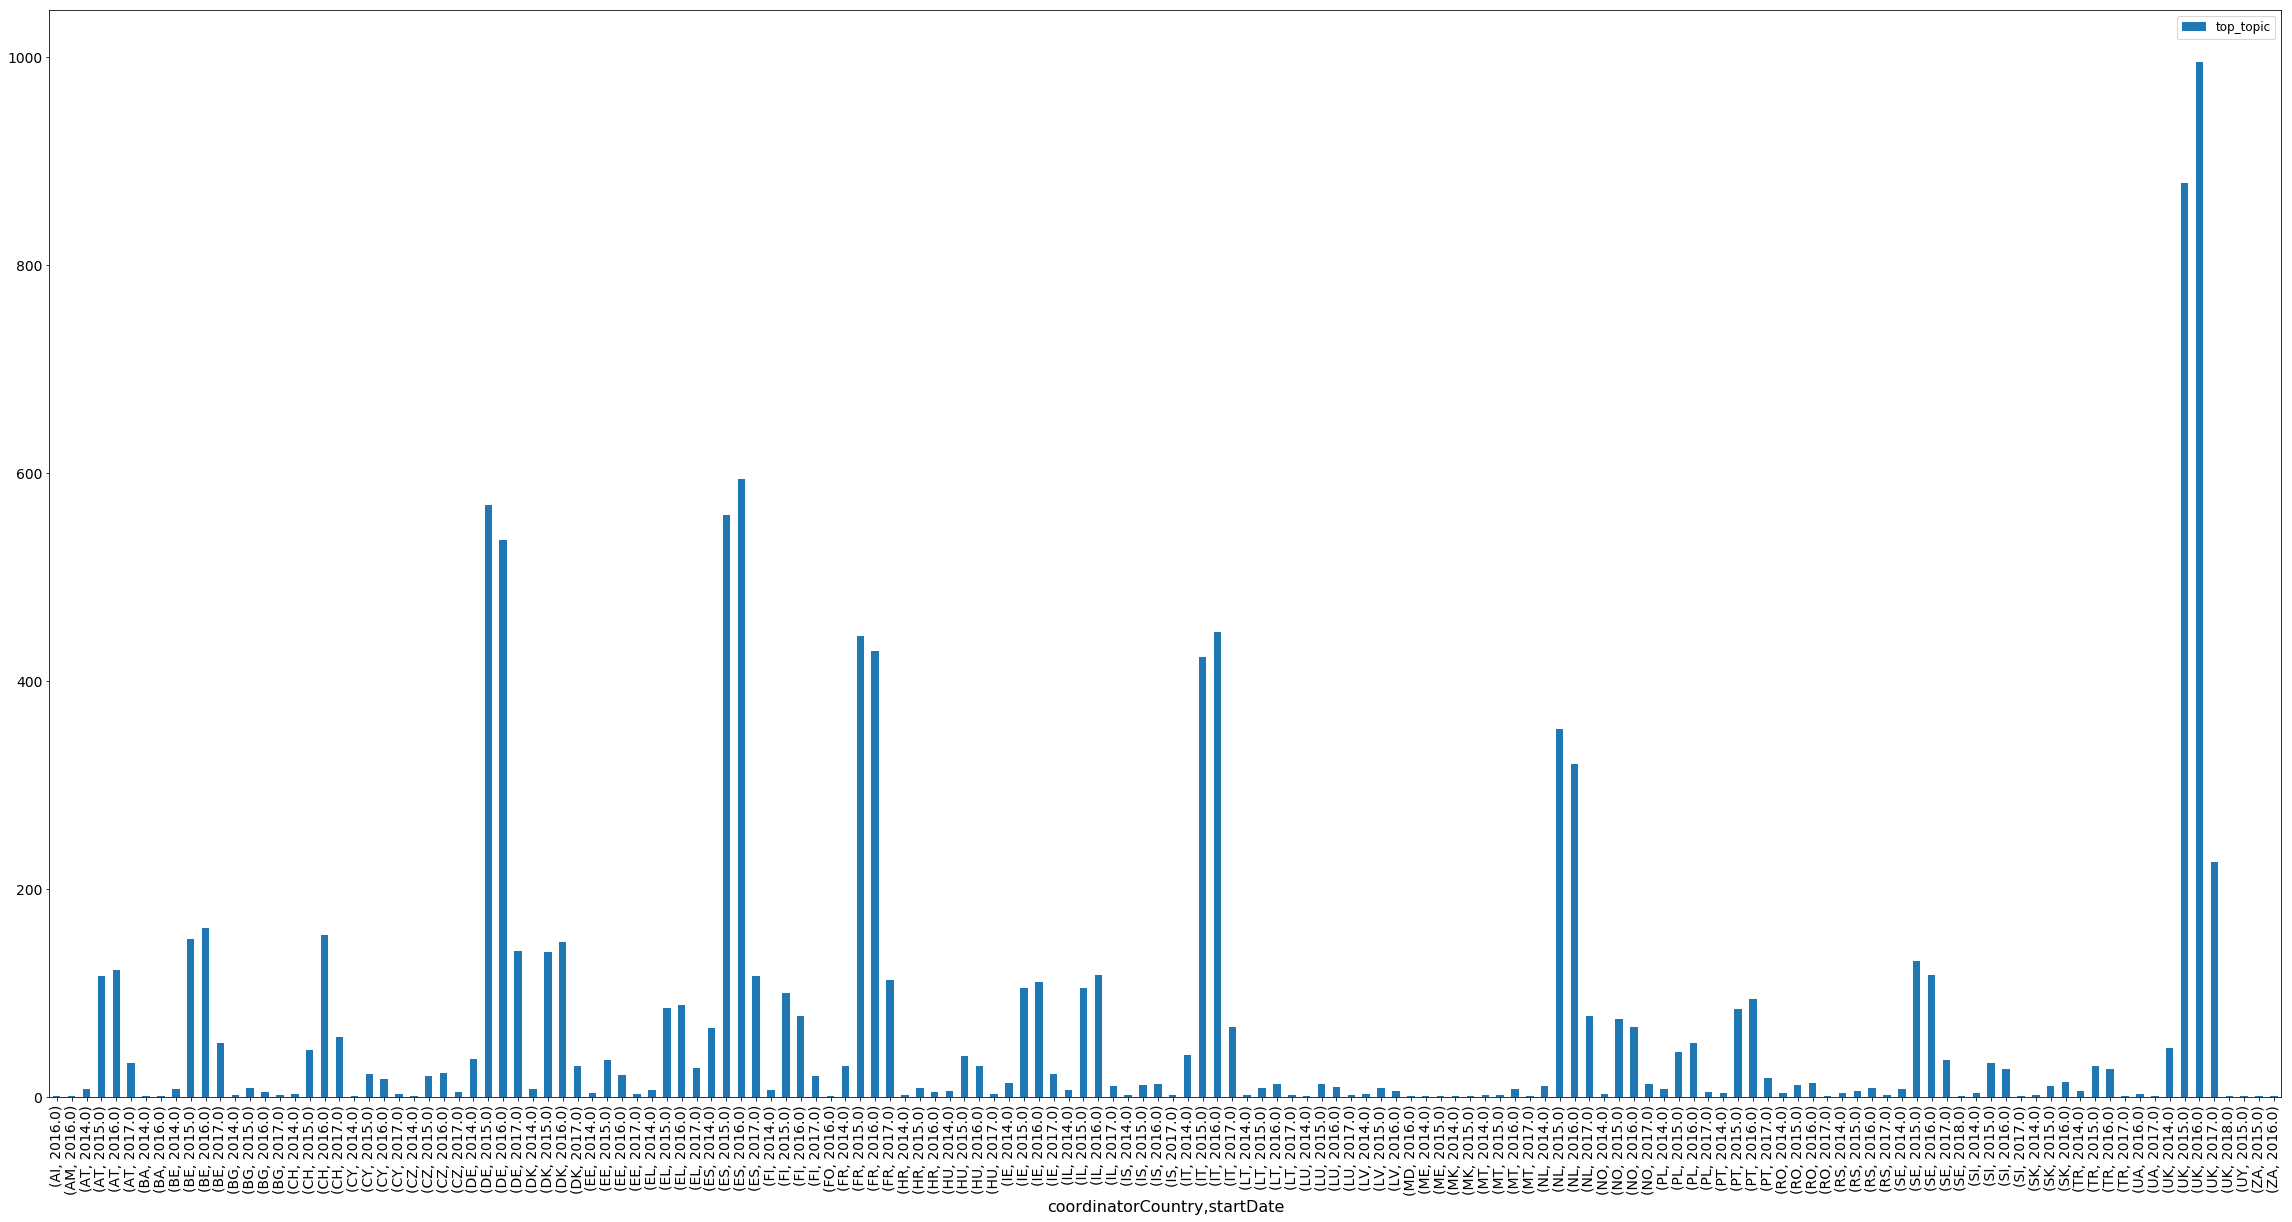

In [441]:
topic_count.plot.bar(figsize=(40,20))

# Countries and topic count

should be topic count (y axis) per year (x axis) and country is colour column 

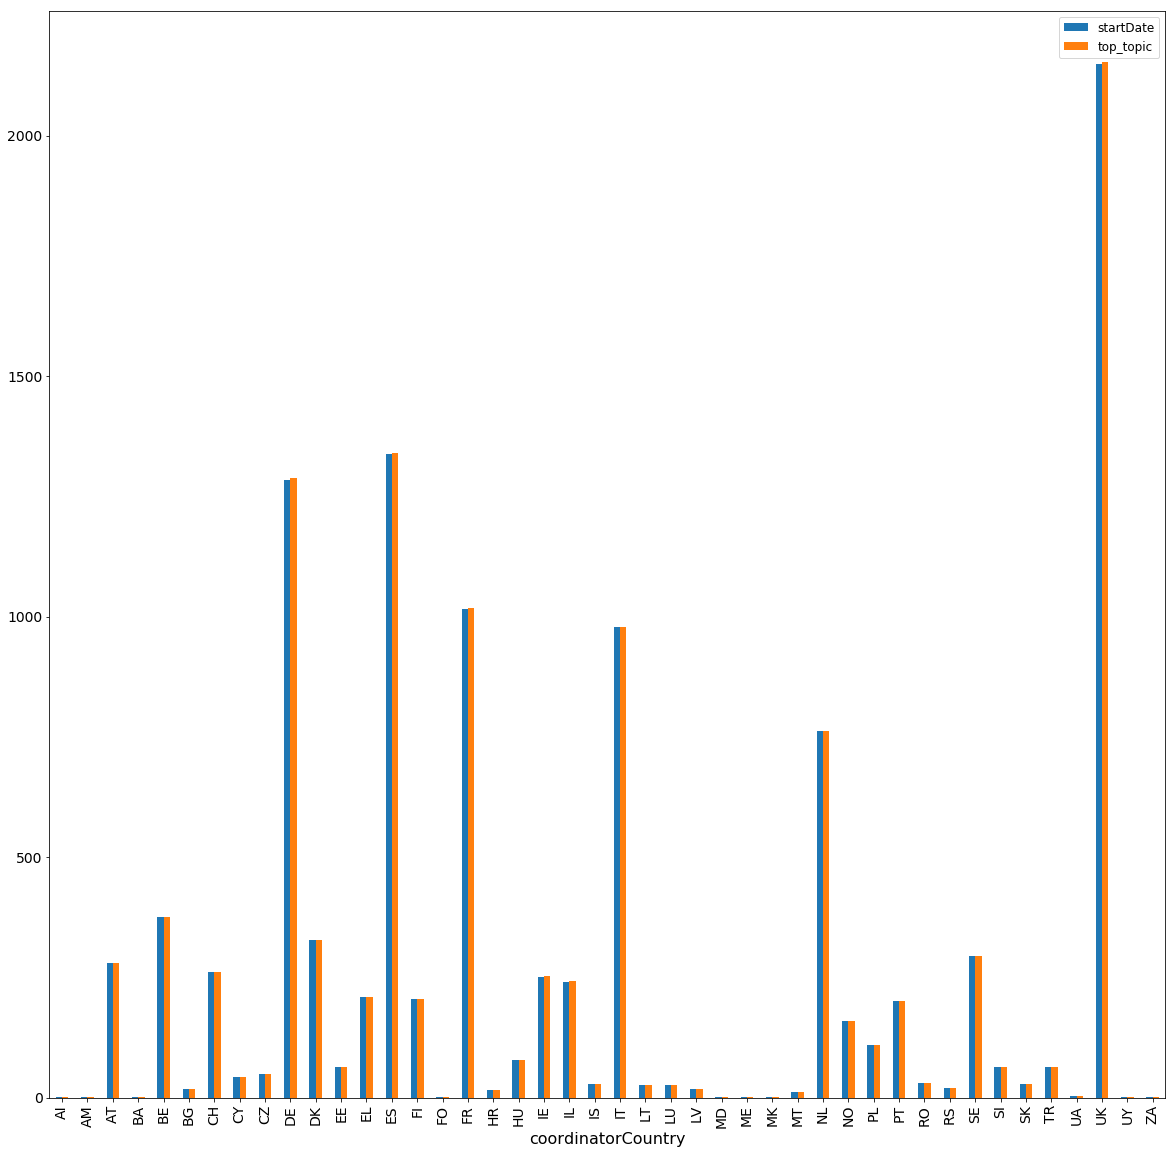

In [437]:
c.plot.bar(figsize =(20,20))

# Topic counts

topic with most projects can take a few of those and plot with country over years

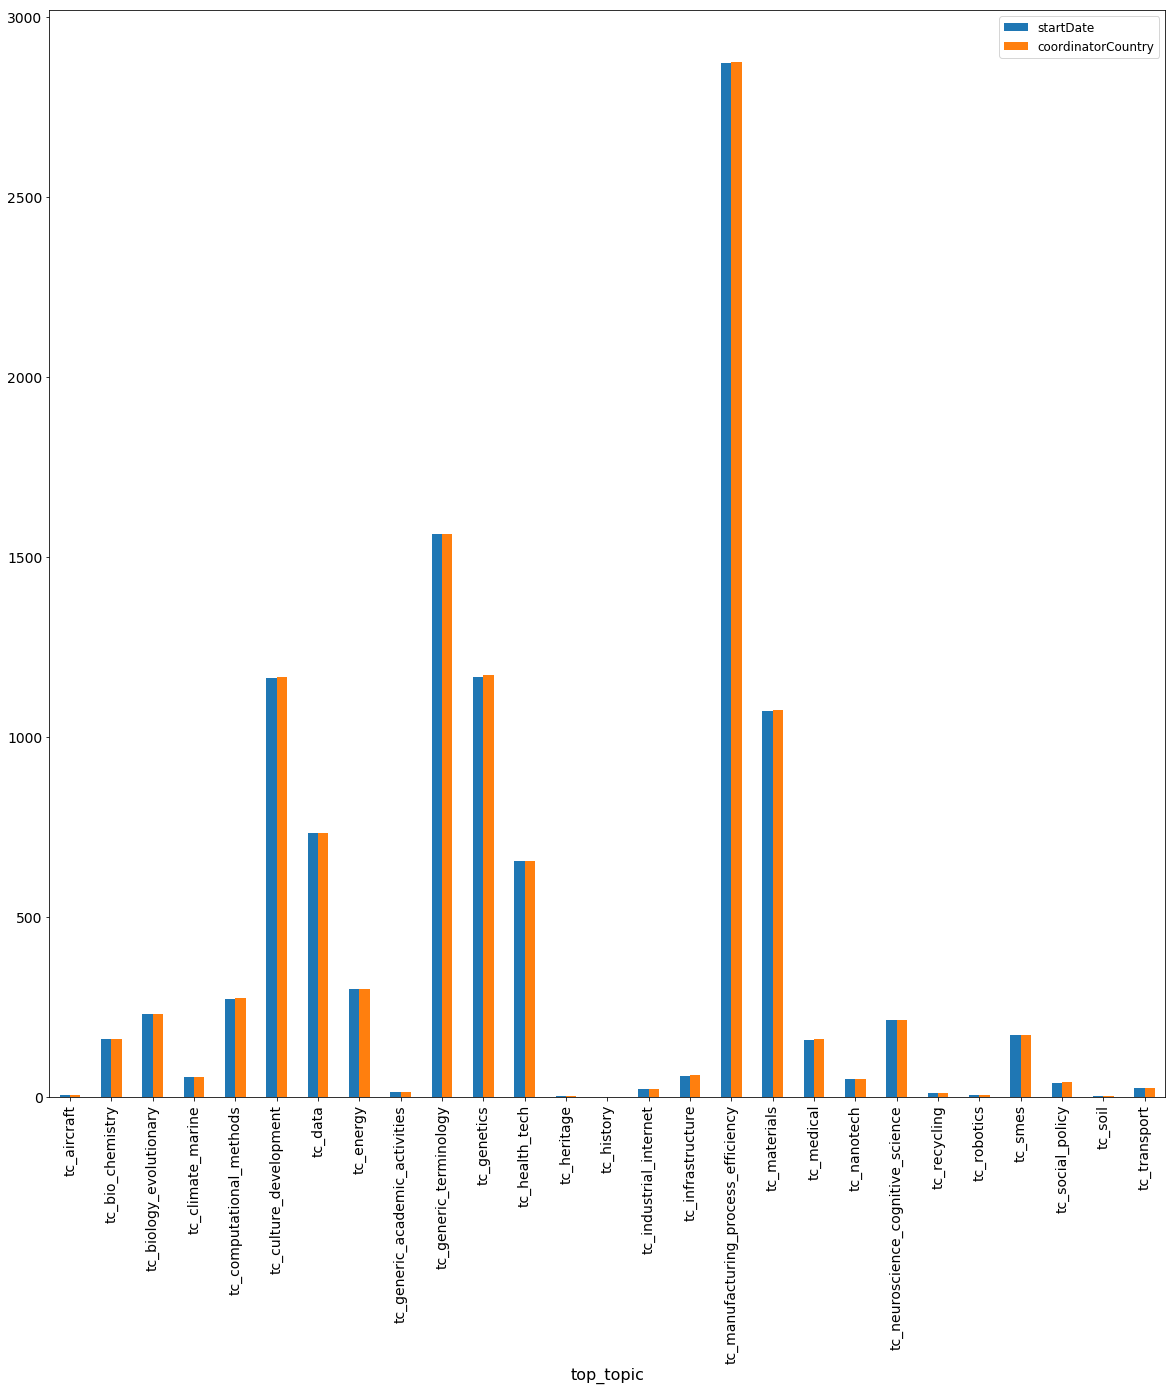

In [432]:
t.plot.bar(figsize =(20,20))

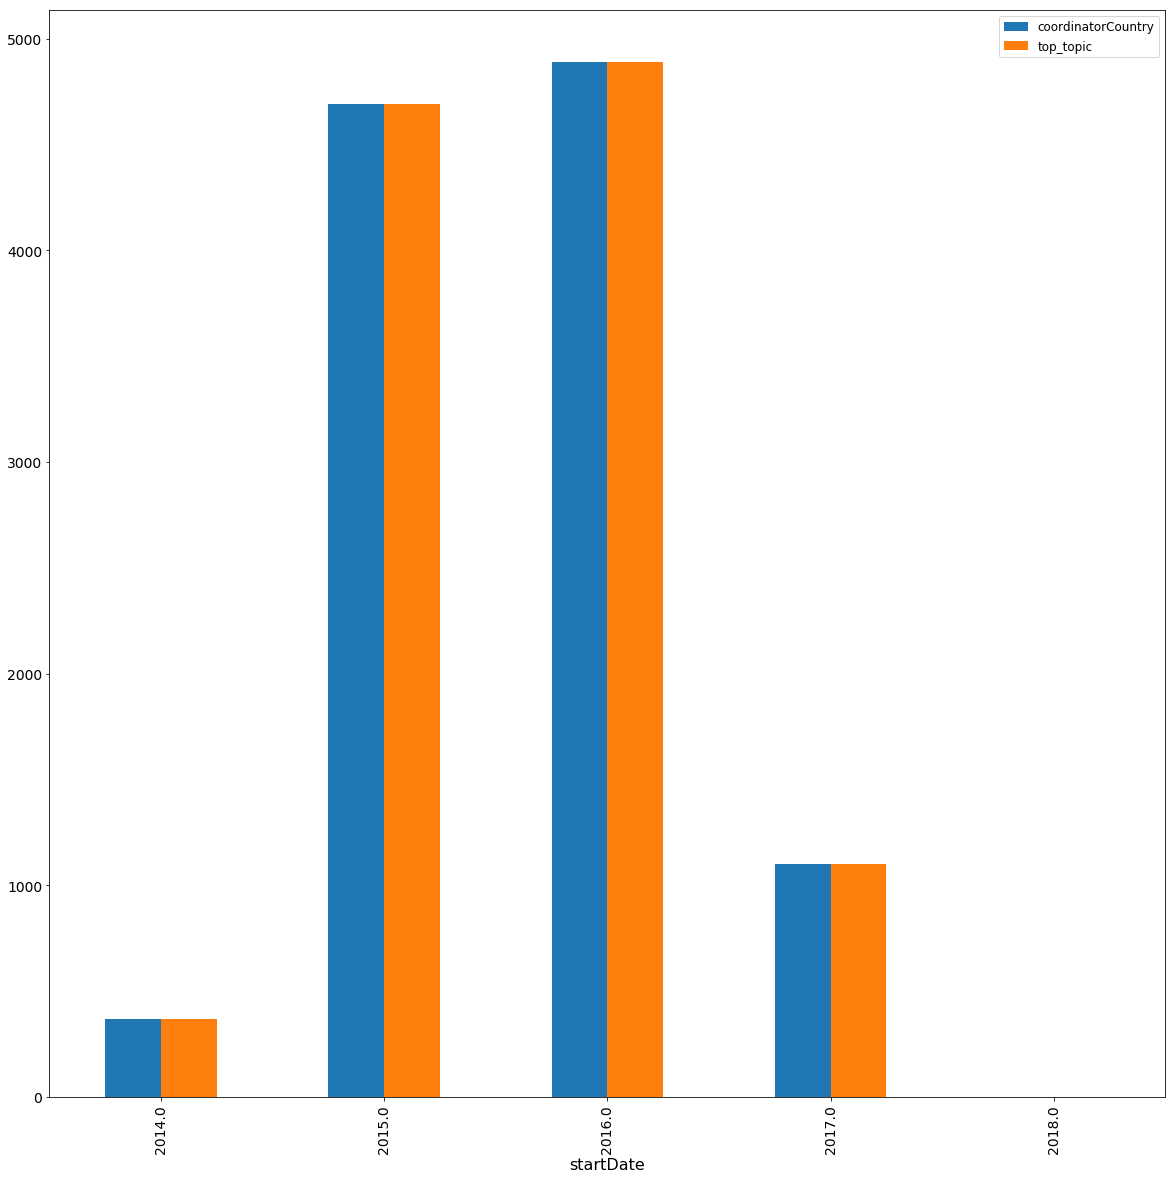

In [438]:
y.plot.bar(figsize =(20,20))

## To Do  

## Take 2-3 topics and look at which countries are participating the most in these topics and how that is changing over time and of what significance that is. 
e.g. UK key player for data from 2014-2015 and then overtaken by FI what does this mean for UK innovation in data. Insights into how things change for countries throughout the years in regards to the topics they work on 

# side note: look at which country has topics with a high count... e.g CH has the highest count for medicine for example over the years... what does this mean then. So you could look at two things a select few topics to zoom into in addition to every countries maximum topic count and what that means.

make a stacked bar graph for each country and topic over years... 

x axis = topic
y axis = year
on chart = stacked bar with each country 

Then take for a select few and do the same! Also get some line graphs in there

In [232]:
tyc

,startDate,coordinatorCountry,top_topic
0,2015.0,UK,tc_infrastructure
1,2015.0,UK,tc_data
2,2015.0,DE,tc_manufacturing_process_efficiency
3,2015.0,ES,tc_infrastructure
4,2015.0,DE,tc_culture_development
5,2015.0,ES,tc_genetics
6,2015.0,UK,tc_culture_development
7,2015.0,UK,tc_health_tech
8,2015.0,TR,tc_manufacturing_process_efficiency
9,2015.0,NO,tc_culture_development


In [100]:
df[df.coordinatorCountry =='UK']

,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,...,participants,participantCountries,subjects,name,broadTopic,subTopic,topic_identity,topic_identifier,clean_topic_identifier,call_identifier
0,0,196706,673348,LCODA,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.4.,IT-1-2014-1,H2020,Electronic scanning MIMO Radar for railway lev...,2015-06-01,...,NaN,NaN,NaN,DEDICATED SME INSTRUMENT,INDUSTRIAL LEADERSHIP,Innovation in SMEs,IT,IT,IT,SMEINST
1,1,196709,660362,PASS,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,Paleozoic Seafloor Spreading,2015-09-04,...,NaN,NaN,NaN,Marie Skłodowska-Curie Actions,EXCELLENT SCIENCE,MARIE SKLODOWSKA-CURIE ACTIONS,MSCA,MSCA,MSCA,MSCA
6,6,196678,639633,MASSIVE,SIGNED,H2020-EU.1.1.,ERC-StG-2014,H2020,"Multinationals, Institutions and Innovation in...",2015-06-01,...,NaN,NaN,NaN,EUROPEAN RESEARCH COUNCIL,EXCELLENT SCIENCE,EUROPEAN RESEARCH COUNCIL,ERC,ERC,ERC,ERC
7,7,196692,672199,ImplantFreeSpine,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.1.,PHC-12-2014-1,H2020,World’s first complete motion-preservation 'Im...,2015-06-01,...,NaN,NaN,NaN,PERSONALISING HEALTH AND CARE,SOCIETAL CHALLENGES,"Health, demographic change and wellbeing",PHC,PHC,PHC,SMEINST
14,14,196663,673651,IPHYC-H2020,SIGNED,H2020-EU.2.3.1.;H2020-EU.2.1.4.,BIOTEC-5a-2014-1,H2020,EU market research for an innovative algae bas...,2015-05-01,...,NaN,NaN,NaN,BIOTECHNOLOGY,INDUSTRIAL LEADERSHIP,Leadership in enabling and industrial technolo...,BIOTEC,BIOTEC,BIOTEC,SMEINST
19,19,196637,651407,Ultroslag,SIGNED,H2020-EU.3.5.;H2020-EU.2.3.1.,SC5-20-2014-1,H2020,A new integrated sustainable processing system...,2014-10-01,...,NaN,NaN,NaN,GREENING THE ECONOMY,SOCIETAL CHALLENGES,"Climate action, environment, resource efficien...",SC5,SC5,SC5,SMEINST
20,20,196707,636573,CREATE,SIGNED,H2020-EU.3.4.,MG-5.3-2014,H2020,Congestion Reduction in Europe : Advancing Tra...,2015-06-01,...,EUROCITIES ASBL;TRANSPORT FOR LONDON*TFL;VECTO...,BE;UK;TR;RO;FR;DE;AT;DK;EE;JO;MK,NaN,MOBILITY FOR GROWTH,SOCIETAL CHALLENGES,"Smart, green and integrated transport",MG,MG,MG,MG
25,25,196644,659749,InterAct,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2014-EF,H2020,INTerdisciplinary ACTion for accelerating RD o...,2015-07-01,...,NaN,NaN,NaN,Marie Skłodowska-Curie Actions,EXCELLENT SCIENCE,MARIE SKLODOWSKA-CURIE ACTIONS,MSCA,MSCA,MSCA,MSCA
29,29,196634,649720,CEPPI 2,SIGNED,H2020-EU.3.3.7.,EE-08-2014,H2020,Coordinated energy-related PPIs actions for ci...,2015-04-01,...,OPTIMAT LIMITED;JERA CONSULTING LIMITED;AYUNTA...,UK;ES;HU;PL;DE,NaN,ENERGY EFFICIENCY,SOCIETAL CHALLENGES,"Secure, Clean and Efficient Energy",EE,EE,EE,EE
33,33,196661,672124,SEEABLE,SIGNED,H2020-EU.2.3.1.;H2020-EU.2.1.1.,ICT-37-2014-1,H2020,An Innovative ICT Solution for Providing Bespo...,2015-05-01,...,NaN,NaN,NaN,Information and Communication Technologies,INDUSTRIAL LEADERSHIP,Leadership in enabling and industrial technolo...,ICT,ICT,ICT,SMEINST


In [20]:
df.startDate[0]

'2015-06-01'

In [21]:
df1 = df[['id', 'objective']]
df1

,id,objective
0,673348,The overall project objective is to develop an...
1,660362,It is now recognised that large oceanic detach...
2,672521,"Worldwide, over 280.000 General Aviation (GA) ..."
3,672228,Sense4Care S.L. (S4C) is high-tech SME constit...
4,640627,Title: Domestic Servants in Colonial South Asi...
5,654933,Cell fate conversion processes bear considerab...
6,639633,Multinational Enterprises (MNEs) are key ‘tect...
7,672199,Scoliosis affects 2-3% of the world population...
8,674710,CLOUD-VAS is a CLOUD-based Vessel Allocation d...
9,671980,The so called “legacy media” players such as b...


In [35]:
new_df = pd.concat([df1, topic_df], axis=1)

In [36]:
# new dataframe consisting of the abstracts and their weighted token probability within each topic
new_df

,id,objective,index,tc_aircraft,tc_bio_chemistry,tc_biology_evolutionary,tc_climate_marine,tc_computational_methods,tc_culture_development,tc_data,...,tc_materials,tc_medical,tc_nanotech,tc_neuroscience_cognitive_science,tc_recycling,tc_robotics,tc_smes,tc_social_policy,tc_soil,tc_transport
0,673348,The overall project objective is to develop an...,0,0.000000,0.012447,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.012522,0.027612,0.000000,0.000000,0.000000,0.000000,0.000000,0.060875
1,660362,It is now recognised that large oceanic detach...,1,0.000000,0.000000,0.103373,0.026957,0.000000,0.093805,0.472163,...,0.040395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,672521,"Worldwide, over 280.000 General Aviation (GA) ...",2,0.093608,0.000000,0.000000,0.000000,0.000000,0.035081,0.000000,...,0.052035,0.000000,0.000000,0.000000,0.011552,0.000000,0.019406,0.000000,0.000000,0.025013
3,672228,Sense4Care S.L. (S4C) is high-tech SME constit...,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.067213,0.000000,...,0.024831,0.000000,0.021388,0.000000,0.000000,0.000000,0.077822,0.000000,0.000000,0.000000
4,640627,Title: Domestic Servants in Colonial South Asi...,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.363219,0.000000,...,0.339300,0.000000,0.015203,0.000000,0.000000,0.000000,0.000000,0.022125,0.000000,0.000000
5,654933,Cell fate conversion processes bear considerab...,5,0.000000,0.072504,0.154963,0.000000,0.087155,0.035389,0.000000,...,0.097678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,639633,Multinational Enterprises (MNEs) are key ‘tect...,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.338733,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014159,0.000000,0.020833,0.000000,0.000000,0.000000
7,672199,Scoliosis affects 2-3% of the world population...,7,0.000000,0.000000,0.018821,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017004
8,674710,CLOUD-VAS is a CLOUD-based Vessel Allocation d...,8,0.000000,0.000000,0.000000,0.000000,0.022503,0.197782,0.128869,...,0.013839,0.000000,0.026903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,671980,The so called “legacy media” players such as b...,9,0.000000,0.000000,0.010798,0.000000,0.000000,0.442202,0.095724,...,0.000000,0.000000,0.000000,0.061412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [120]:
new_df.ix[1]

id                                                                                672521
objective                              Worldwide, over 280.000 General Aviation (GA) ...
index                                                                                  2
tc_aircraft                                                                    0.0936085
tc_bio_chemistry                                                                       0
tc_biology_evolutionary                                                                0
tc_climate_marine                                                                      0
tc_computational_methods                                                               0
tc_culture_development                                                         0.0350807
tc_data                                                                                0
tc_energy                                                                       0.206959
tc_generic_academic_a

In [121]:
new_df.objective[1]

'It is now recognised that large oceanic detachment faults are fundamentally important along slow-spreading rate portions of the mid-ocean ridge system. These fault systems have been the target of numerous scientific expeditions leading to a new paradigm of “detachment-mode” spreading. However, in the modern oceans this style of spreading can only be documented back to 10-12 Ma. To understand these systems in the deep geological past it is necessary to work on ancient examples of detachment faults in ophiolites, slices of oceanic lithosphere that have been emplaced tectonically onto continental margins and which expose ocean floor structures in 3-D. Recent work in the Mirdita ophiolite of Albania has demonstrated that detachment-mode spreading operated in the Jurassic period. This project will extend this record back to the Palaeozoic, by investigating a detachment system preserved in the Thetford Mines Ophiolite of Canada. An integrated field-based structural and palaeomagnetic invest

In [108]:
new_df.sort_values(['tc_transport', 'tc_soil', 'tc_social_policy'], ascending = [False, , True])

,id,objective,index,tc_aircraft,tc_bio_chemistry,tc_biology_evolutionary,tc_climate_marine,tc_computational_methods,tc_culture_development,tc_data,...,tc_materials,tc_medical,tc_nanotech,tc_neuroscience_cognitive_science,tc_recycling,tc_robotics,tc_smes,tc_social_policy,tc_soil,tc_transport
1857,652821,'The general objective of the project is to ov...,1857,0.000000,0.000000,0.000000,0.000000,0.000000,0.084169,0.000000,...,0.027411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.690934
379,663198,'Musicians play the scores basically like they...,379,0.000000,0.000000,0.000000,0.000000,0.000000,0.037055,0.022338,...,0.057061,0.000000,0.000000,0.000000,0.000000,0.000000,0.045634,0.000000,0.0,0.606101
108,663113,DRESSFORMER is a B2B/B2C platform technology a...,108,0.000000,0.000000,0.000000,0.000000,0.032701,0.131806,0.000000,...,0.038346,0.000000,0.000000,0.014721,0.000000,0.000000,0.000000,0.000000,0.0,0.578233
160,674094,The project aims to improve the efficiency and...,160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053602,...,0.000000,0.000000,0.047083,0.000000,0.000000,0.000000,0.000000,0.012867,0.0,0.577930
1980,650702,"The Smart Actuator Company Ltd develops smart,...",1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.501050
3951,685082,Buiding on our highly successful SME Instument...,3951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.482110
1028,658602,Climate models of the sort used by the Intergo...,1028,0.000000,0.000000,0.030943,0.109106,0.000000,0.047879,0.000000,...,0.158924,0.000000,0.000000,0.112186,0.000000,0.000000,0.019912,0.000000,0.0,0.434793
1378,656349,In order to understand the nature of complex a...,1378,0.000000,0.000000,0.000000,0.000000,0.066382,0.000000,0.098835,...,0.177186,0.000000,0.000000,0.141531,0.000000,0.000000,0.000000,0.000000,0.0,0.379874
10145,734139,Safety is aviation’s top priority. To work for...,10145,0.032452,0.000000,0.000000,0.013219,0.000000,0.092637,0.158974,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.343419
10141,731730,The S2020 project “PJ09 Advanced DCB” evolves ...,10141,0.000000,0.000000,0.038790,0.022970,0.000000,0.094950,0.243257,...,0.015188,0.000000,0.000000,0.000000,0.000000,0.000000,0.023066,0.000000,0.0,0.341102


In [157]:
# juan named them 'tc_' deliberatly so it would be easier to assign functions to all columns
#if tc_ in position one the value of the column will be from ascending
clusters_sense_check = []

for cluster in [x for x in new_df.columns if x.split("_")[0]=='tc']:
    sorted_df = new_df.sort_values(cluster,ascending=False)['objective'][:5]
    
    clusters_sense_check.append([cluster,sorted_df])
    
    
    # assigned each column (topic) to its abstract with 5 of the highest projects 

Will be taking 5 of these projects and checking them. So now what I need to do is: 

In [137]:
clusters_sense_check[25][0]

'tc_soil'

In [134]:
len(new_df.columns)

30

Clean up all your data
Create an analysis notebook where you will analyse the data and look for the questions you want to answer and then try and answer those whilst commenting all the way on what exactly you are doing.

When you find what you are trying to do- there should be a full commentary on the questions you are answering and how you will answer them. 

In [167]:
clusters_sense_check

[['tc_aircraft', 1925    'Airline operators are faced with increased ne...
  1818    PiggyBaggy is a crowdsourced logistics service...
  51      Contentious Rights: A Comparative Study of Int...
  1807    Meiotic recombination is an essential process ...
  6411    Airplane seat cushions are designed to be safe...
  Name: objective, dtype: object],
 ['tc_bio_chemistry', 1725    Fluorinated organic molecules play a pivotal r...
  6118    The objective of my project is to develop new ...
  1140    One of the major challenges facing the chemica...
  9278    Sustainable production of chemical building bl...
  1108    The main goal of this project is the developme...
  Name: objective, dtype: object],
 ['tc_biology_evolutionary',
  1683    Animals have marine origins, with only three p...
  106     There are many examples in nature where inter-...
  794     Comparisons among whole genome sequences allow...
  717     Polyploidy events (i.e. the process of genome ...
  1788    Evolution of ven

In [206]:
clusters_sense_check[26][1]

1857    'The general objective of the project is to ov...
379     'Musicians play the scores basically like they...
108     DRESSFORMER is a B2B/B2C platform technology a...
160     The project aims to improve the efficiency and...
1980    The Smart Actuator Company Ltd develops smart,...
Name: objective, dtype: object

,Unnamed: 0,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,...,participants,participantCountries,subjects,name,broadTopic,subTopic,topic_identity,topic_identifier,clean_topic_identifier,call_identifier
9141,9141,205165,736776,SPLASH,SIGNED,H2020-EU.2.3.1.;H2020-EU.3.4.,SMEInst-10-2016-2017,H2020,Sail PLAn service for energy efficient SHippin...,2016-08-01,...,NaN,NaN,NaN,DEDICATED SME INSTRUMENT,INDUSTRIAL LEADERSHIP,Innovation in SMEs,SMEInst,SMEInst,SMEInst,SMEINST
